In [1]:
import os
os.sys.path

['/Users/zhangxin/anaconda3/envs/py36_opencv/lib/python36.zip',
 '/Users/zhangxin/anaconda3/envs/py36_opencv/lib/python3.6',
 '/Users/zhangxin/anaconda3/envs/py36_opencv/lib/python3.6/lib-dynload',
 '',
 '/Users/zhangxin/anaconda3/envs/py36_opencv/lib/python3.6/site-packages',
 '/Users/zhangxin/anaconda3/envs/py36_opencv/lib/python3.6/site-packages/IPython/extensions',
 '/Users/zhangxin/.ipython']

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def show_img_hist(img):
    hist,bins = np.histogram(img.flatten(), bins=256, range=[0,256])
    #     print("hist : 直方图统计结果")
    #     print(hist)
    #     print("bins : 灰度值")
    #     print(bins)

    #cumsum : Return the cumulative sum of the elements along a given axis.
    cdf = hist.cumsum()
    #     print("cdf : 直方图累加结果")
    #     print(cdf)
    cdf_normalized = cdf * hist.max()/ cdf.max()
    #     print("cdf_normalized : 累加结果归一化")
    #     print(cdf_normalized)
    plt.subplot(121),plt.imshow(img)
    plt.subplot(122),plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    return cdf

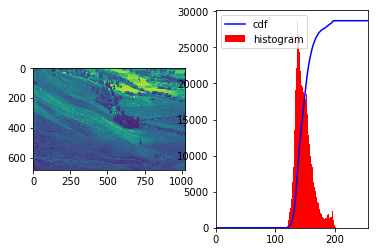

In [4]:
img = cv2.imread('wiki.jpg',0)
# plt.imshow(img)
cdf = show_img_hist(img)

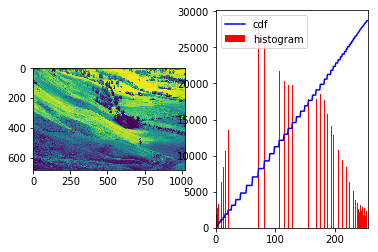

In [5]:
cdf_m = np.ma.masked_equal(cdf,0)
# print(cdf_m)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# print(cdf_m)
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# print(cdf)
img2 = cdf[img]
show_img_hist(img2);

(<matplotlib.axes._subplots.AxesSubplot at 0x11f196fd0>,
 <matplotlib.image.AxesImage at 0x11f4e24e0>)

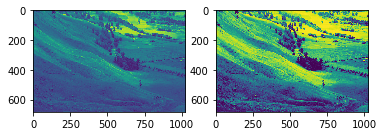

In [6]:
# plt.subplot(121),plt.imshow(img)
# plt.subplot(122),plt.imshow(img2)
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(img2)

(683, 2048)


(<matplotlib.axes._subplots.AxesSubplot at 0x110a3a7b8>,
 <matplotlib.image.AxesImage at 0x11f78b048>)

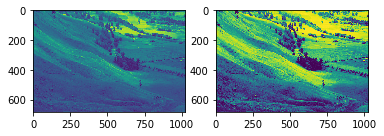

In [7]:
img = cv2.imread('wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
print(res.shape)
# plt.imshow(res)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(equ)

#  CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [8]:
img = cv2.imread('tsukuba_l.png',0)
# plt.imshow(img);

(<matplotlib.axes._subplots.AxesSubplot at 0x11f7ab128>,
 <matplotlib.image.AxesImage at 0x12048a2b0>)

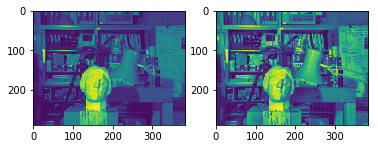

In [9]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(cl1)

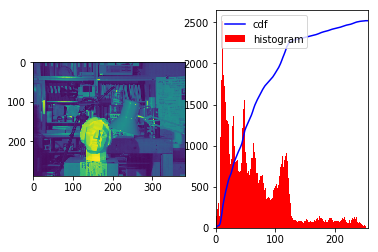

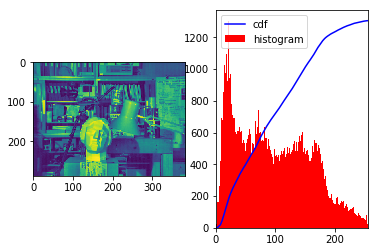

In [10]:
show_img_hist(img);
show_img_hist(cl1);